# Rebecca Godard

## Research question/interests

I am interested in using survival analysis or another analytic method to predict the length of time an incarcerated patient spends in psychiatric treatment. Specifically, I want to know whether number of arrests and crimes, time spent in jail, and prisoner race predict time spent in treatment.

# Milestone 2

In [2]:
import pandas as pd

In [10]:
rec1data = pd.read_csv("../data/processed/rec1data.csv")
rec1data.head()

,Unnamed: 0,id,rid,sex,birth,race,educ,marital,children,occupat,...,crime05,crime06,crime07,crime08,crime09,crime10,crime11,crime12,crime13,crime14
0,1,1,991,1,18,1,10,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,991,1,16,1,10,2,3,20,...,0,0,0,0,0,0,0,0,0,0
2,3,3,991,1,21,1,7,1,0,10,...,0,0,0,0,0,0,0,0,0,0
3,4,4,991,1,32,1,7,1,0,10,...,0,0,0,0,0,0,0,0,0,0
4,5,5,991,1,53,2,11,1,0,10,...,0,0,0,0,0,0,0,0,0,0


In [16]:
rec2data = pd.read_csv("../data/processed/rec2data.csv")
rec2data.head()

,Unnamed: 0,id,rid,pub_intox,pet_larc,misc,assault,arson,rape,forgery,...,crim_poss_weap,crim_poss_instr,obst_gov,res_arrest,escape,crim_poss_stolen,reck_endanger,crim_neg_hom,youth_off,crim_tresspasss
0,1,1,992,5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,2,992,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,992,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,992,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,992,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
psychdata = pd.read_csv("../data/processed/psychdata.csv")
psychdata.head()

,Unnamed: 0,id,contact,date_contact,facility,address,diagnosis,service,date_term,reason_term
0,1,1,1,600804,1,100,103,0,600808,0
1,2,1,2,600809,2,100,715,1,601130,9
2,3,1,3,640320,1,100,715,0,640401,0
3,4,1,4,640910,2,100,715,0,641027,9
4,5,1,5,641109,1,100,103,0,641113,0


# Milestone 3

## Exploratory Data Analysis

In [8]:
import numpy as np

### Record 1

In [11]:
# Adding a column for total number of crimes
# Each case has at least 1 crime, but I want to know the average and maximum
# Crime variables contain 0s if the person didn't commit that many crimes

rec1data['crime_num'] = (rec1data.iloc[:,12:25] != 0).sum(axis=1)
rec1data['crime_num'].describe()


# The majority of prisoners had 1 or 0 crimes, but the maximum is 13. 
# This is a very positively skewed variable.

count    1003.000000
mean        0.816550
std         1.115239
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        13.000000
Name: crime_num, dtype: float64

array([[<AxesSubplot:title={'center':'crime_num'}>]], dtype=object)

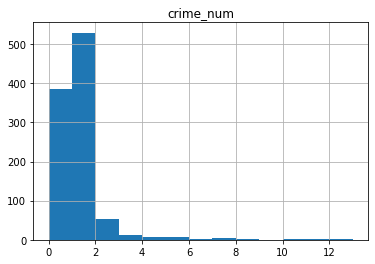

In [14]:
rec1data.hist(column = "crime_num", bins = range(14))

In [15]:
(rec1data['crime_num'] > 0).sum() / 1003

# Only 62% of the prisoners have a crime record. This seems strange! 
# Maybe something is going on with record 2.

0.6151545363908275

### Record 2

In [17]:
rec2data['crime_num'] = (rec2data.iloc[:,3:29] != 0).sum(axis=1)
rec2data['crime_num'].describe()

count    1003.000000
mean        0.959123
std         1.735885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         9.000000
Name: crime_num, dtype: float64

array([[<AxesSubplot:title={'center':'crime_num'}>]], dtype=object)

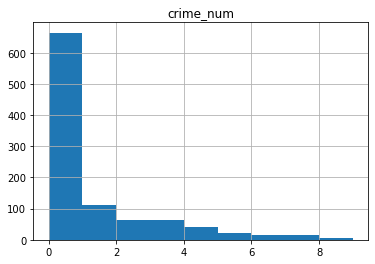

In [18]:
rec2data.hist(column = "crime_num", bins = range(10))

In [19]:
(rec2data['crime_num'] > 0).sum() / 1003

# Even fewer crime records here. Maybe I need to merge these data frames to get the whole picture.

0.33798604187437686

In [20]:
(rec1data['crime_num'] > 0).sum() / 1003 + (rec2data['crime_num'] > 0).sum() / 1003

# This is close enough to 1 that I'm wondering if each prisoner only has a crime record in 
# one of the two datasets.

0.9531405782652044

In [21]:
# calculating the number of crimes across both datasets for each prisoner
rec1_crimenum = rec1data[["id","crime_num"]]
rec2_crimenum = rec2data[["id", "crime_num"]]
comb_data = rec1_crimenum.merge(rec2_crimenum, on = "id", how = "outer")
comb_data.columns = ["id", "crime_num_1", "crime_num_2"]
comb_data['crime_num_tot'] = comb_data["crime_num_1"] + comb_data["crime_num_2"]
comb_data.head()

,id,crime_num_1,crime_num_2,crime_num_tot
0,1,1,4,5
1,2,1,0,1
2,3,1,2,3
3,4,1,0,1
4,5,1,3,4


In [22]:
(comb_data["crime_num_tot"] > 0).sum() / 1003

# Ok, so my initial hypothesis was wrong. I don't know why there are prisoners 
# who weren't convicted of a crime - maybe they were in jail awaiting trial?
# In any case, I'll likely just use the ones who were convicted. 

0.6151545363908275

### Psychiatric Contact Data

In [25]:
# I want to convert the date columns to datetime objects

# first have to add a 19 to each of them for as_datetime to work
psychdata["date_contact"] = psychdata["date_contact"] + 19000000
psychdata["date_term"] = psychdata["date_term"] + 19000000
psychdata.head()

,Unnamed: 0,id,contact,date_contact,facility,address,diagnosis,service,date_term,reason_term
0,1,1,1,19600804,1,100,103,0,19600808,0
1,2,1,2,19600809,2,100,715,1,19601130,9
2,3,1,3,19640320,1,100,715,0,19640401,0
3,4,1,4,19640910,2,100,715,0,19641027,9
4,5,1,5,19641109,1,100,103,0,19641113,0


In [26]:
# Converting to datetime
psychdata["date_contact"] = pd.to_datetime(psychdata["date_contact"], format='%Y%m%d', errors = "coerce")
psychdata["date_term"] = pd.to_datetime(psychdata["date_term"], format='%Y%m%d', errors = "coerce")
psychdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    4548 non-null   int64         
 1   id            4548 non-null   int64         
 2   contact       4548 non-null   int64         
 3   date_contact  4545 non-null   datetime64[ns]
 4   facility      4548 non-null   int64         
 5   address       4548 non-null   object        
 6   diagnosis     4548 non-null   object        
 7   service       4548 non-null   int64         
 8   date_term     4394 non-null   datetime64[ns]
 9   reason_term   4548 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(2)
memory usage: 355.4+ KB


In [27]:
# Adding new variable for length of treatment
psychdata["length_treat"] = (psychdata["date_term"] - psychdata["date_contact"]).dt.days
psychdata.head()

,Unnamed: 0,id,contact,date_contact,facility,address,diagnosis,service,date_term,reason_term,length_treat
0,1,1,1,1960-08-04,1,100,103,0,1960-08-08,0,4.0
1,2,1,2,1960-08-09,2,100,715,1,1960-11-30,9,113.0
2,3,1,3,1964-03-20,1,100,715,0,1964-04-01,0,12.0
3,4,1,4,1964-09-10,2,100,715,0,1964-10-27,9,47.0
4,5,1,5,1964-11-09,1,100,103,0,1964-11-13,0,4.0


In [28]:
# Something is weird here!  

(psychdata["length_treat"] < 0).sum()
np.argmin(psychdata["length_treat"])

# I've modified the original data frame so will have to import it again
psychdata_org = pd.read_csv("../data/processed/psychdata.csv")
print(psychdata_org["date_contact"][3597])
print(psychdata_org["date_term"][3597])

# Looks like this is an error in the data. I will just delete that value.

psychdata["length_treat"][3597] = None
psychdata["date_contact"][3597] = None
psychdata["date_term"][3597] = None

680828
680406


<ipython-input-28-f823de1b82a2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psychdata["length_treat"][3597] = None
<ipython-input-28-f823de1b82a2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psychdata["date_contact"][3597] = None
<ipython-input-28-f823de1b82a2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psychdata["date_term"][3597] = None


array([[<AxesSubplot:title={'center':'length_treat'}>]], dtype=object)

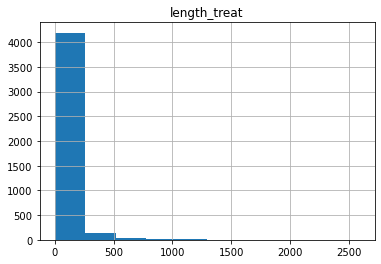

In [29]:
# Histogram of treatment length
psychdata.hist(column = "length_treat")

In [31]:
psychdata["length_treat"].describe()

# Much better. Wow, someone was in treatment for over 7 years 

count    4392.000000
mean       45.910974
std       144.634461
min         0.000000
25%         0.000000
50%         5.000000
75%        21.000000
max      2590.000000
Name: length_treat, dtype: float64

## Analysis Pipeline

### Step 1: Load data

In [32]:
rec1data = pd.read_csv("../data/processed/rec1data.csv")
psychdata = pd.read_csv("../data/processed/psychdata.csv")

### Step 2: Clean data

In [33]:
# Incorrect data
psychdata["date_contact"][3597] = None
psychdata["date_term"][3597] = None

<ipython-input-33-4450631df2b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psychdata["date_contact"][3597] = None
<ipython-input-33-4450631df2b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psychdata["date_term"][3597] = None


In [34]:
# Convert dates to usable format
psychdata["date_contact"] = psychdata["date_contact"] + 19000000
psychdata["date_term"] = psychdata["date_term"] + 19000000

In [35]:
# Remove unneeded columns
psychdata = psychdata[["id", "contact", "date_contact", "diagnosis", "service", "date_term", "reason_term"]]
del rec1data["rid"]

In [36]:
# Remove unneeded rows from matched non-prisoner cases
rec1data = rec1data[rec1data["crime01"] > 0]

In [37]:
# Merge with psychdata, which will delete rows from non-prisoner cases
dta = rec1data.merge(psychdata, on = "id", how = "left")
dta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3479 entries, 0 to 3478
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3479 non-null   int64  
 1   id            3479 non-null   int64  
 2   sex           3479 non-null   int64  
 3   birth         3479 non-null   int64  
 4   race          3479 non-null   int64  
 5   educ          3479 non-null   int64  
 6   marital       3479 non-null   int64  
 7   children      3479 non-null   int64  
 8   occupat       3479 non-null   int64  
 9   arrests       3479 non-null   int64  
 10  jail          3479 non-null   int64  
 11  crime01       3479 non-null   int64  
 12  crime02       3479 non-null   int64  
 13  crime03       3479 non-null   int64  
 14  crime04       3479 non-null   int64  
 15  crime05       3479 non-null   int64  
 16  crime06       3479 non-null   int64  
 17  crime07       3479 non-null   int64  
 18  crime08       3479 non-null 

### Step 3: Process data

In [38]:
# Create length of treatment variable
dta["date_contact"] = pd.to_datetime(dta["date_contact"], format='%Y%m%d', errors = "coerce")
dta["date_term"] = pd.to_datetime(dta["date_term"], format='%Y%m%d', errors = "coerce")
dta["length_treat"] = (dta["date_term"] - dta["date_contact"]).dt.days
dta["length_treat"].describe()

count    3155.000000
mean       37.560697
std       118.498069
min         0.000000
25%         0.000000
50%         5.000000
75%        16.000000
max      2590.000000
Name: length_treat, dtype: float64

In [39]:
# Create number of crimes variable
dta['crime_num'] = (dta.iloc[:,11:24] != 0).sum(axis=1)
dta["crime_num"].describe()

count    3479.000000
mean        1.791894
std         2.000096
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        13.000000
Name: crime_num, dtype: float64

In [40]:
dta.to_csv("processed_data.csv")

### Step 4: Wrangle data
I already did this step earlier.

## Main Analysis

In [41]:
# survival analysis libraries
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
kmf = KaplanMeierFitter()
cph = CoxPHFitter()

In [51]:
import project_functions1 # This is called a relative import
data = project_functions1.load_and_process("../data/processed/rec1data.csv", "../data/processed/psychdata.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4392 entries, 0 to 4553
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           4392 non-null   int64         
 1   sex          407 non-null    float64       
 2   birth        407 non-null    float64       
 3   race         407 non-null    float64       
 4   educ         407 non-null    float64       
 5   marital      407 non-null    float64       
 6   children     407 non-null    float64       
 7   occupat      407 non-null    float64       
 8   arrests      407 non-null    float64       
 9   jail         407 non-null    float64       
 10  crime01      407 non-null    float64       
 11  crime02      407 non-null    float64       
 12  crime03      407 non-null    float64       
 13  crime04      407 non-null    float64       
 14  crime05      407 non-null    float64       
 15  crime06      407 non-null    float64       
 16  crime0

In [56]:
# I need another column here indicating that they all got out of treatment 
data["event"] = 1

In [57]:
# fitting model
kmf.fit(durations =  data["length"], event_observed = data["event"])


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 4392 total observations, 0 right-censored observations>

In [60]:
print(kmf.survival_function_)

# This survival function indicates the likelihood of a prisoner remaining in treatment for a specified number of days. 
# The likelihood of a prisoner being in treatment for longer than 0 days is 62.3%, longer than 1 day is 60.6%, etc.

          KM_estimate
timeline             
0.0          0.622723
1.0          0.606102
2.0          0.584472
3.0          0.559426
4.0          0.524818
...               ...
1852.0       0.000911
1881.0       0.000683
2155.0       0.000455
2340.0       0.000228
2590.0       0.000000

[393 rows x 1 columns]


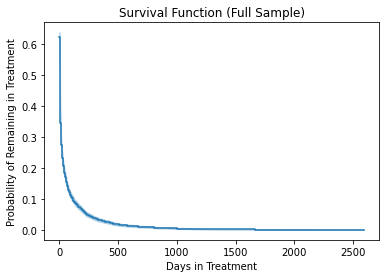

In [65]:
fig1 = kmf.plot()
fig1.set(xlabel = "Days in Treatment", ylabel = "Probability of Remaining in Treatment",
        title = "Survival Function (Full Sample)")
fig1.legend_.remove()
# This is the probability of remaining in treatment. There are no predictor 
# variables in the model yet.

In [90]:
# Adding predictor variables to the model
cph_data = data[["arrests", "jail", "race", "crime_num", "length", "event"]].dropna()
cph.fit(cph_data, "length", event_col = "event")

<lifelines.CoxPHFitter: fitted with 407 total observations, 0 right-censored observations>

In [89]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 407 total observations, 0 right-censored observations>
             duration col = 'length'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 407
number of events observed = 407
   partial log-likelihood = -2034.46
         time fit was run = 2021-11-24 17:29:35 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
arrests    -0.11       0.90       0.30            -0.70             0.48                 0.50                 1.62
race       -0.25       0.78       0.12            -0.49            -0.01                 0.61                 0.99
crime_num   0.18       1.19       0.31            -0.43             0.79                 0.65                 2.20

              z    p   -log2(p)
covariate                      
arrests   -0.36 0.72       0.48
race      -2.03 0.04       4.57
crime_num  0.57 0.57       0.81
---
Concordance = 0.56
Partial AIC = 4074.93
log-likelihood ratio test = 16.09 on 3 df
-log2(p) of ll-ratio test = 9.85

Number of arrests doesn't significantly predict length of psychiatric treatment. 

Time in jail doesn't significantly predict length of psychiatric treatment.

Race predicts length of psychiatric treatment, but this is a categorical variable so we will have to probe further.

Number of crimes doesn't significantly predict length of psychiatric treatment.

In [69]:
# looking for peolpe with highest and lowest values of arrests and jail variables
print(np.argmax(data["arrests"]))
print(np.argmin(data["arrests"]))
print(data["arrests"][[275,59]])

275
59
275    8.0
59     3.0
Name: arrests, dtype: float64


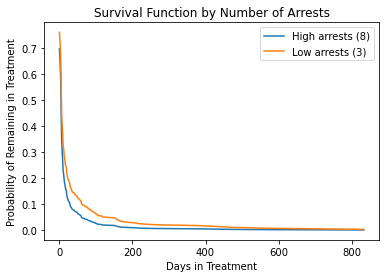

In [72]:
d_data = data.iloc[[275,59],:]
fig2 = cph.predict_survival_function(d_data).plot()
fig2.set(xlabel = "Days in Treatment", ylabel = "Probability of Remaining in Treatment",
        title = "Survival Function by Number of Arrests")
fig2.legend(["High arrests (8)", "Low arrests (3)"])

A prisoner with 8 arrests is likely to be in psychiatric treatment for a shorter amount of time than a prisoner with 8 arrests. This is very strange and the complete opposite of what I would have expected. At the same time, both have a very high probability of getting out of treatment very quickly (within 5 days). 

In [73]:
# Looking for participants of different races with the same number of arrests
data["arrests"].median()
screen = [(data["arrests"] == 7) & (data["race"] == 1)]
print(np.nonzero(screen))
screen = [(data["arrests"] == 7) & (data["race"] == 2)]
print(np.nonzero(screen))



(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([ 83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 274]))
(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0]), array([ 74,  75,  76,  77,  78, 298, 299, 300, 301, 302, 303, 304, 305,
       306, 307, 308, 309, 310, 311, 312, 399, 400, 401]))


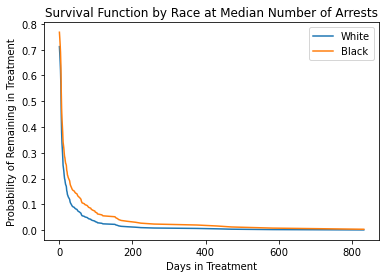

In [76]:
d_data = data.iloc[[83,74],:]
fig3 = cph.predict_survival_function(d_data).plot()
fig3.set(xlabel = "Days in Treatment", ylabel = "Probability of Remaining in Treatment",
        title = "Survival Function by Race at Median Number of Arrests")
fig3.legend(["White", "Black"])

In [77]:
# Looking for participants of different races with the same number of arrests - higher and lower values this time
screen = [(data["arrests"] == 3) & (data["race"] == 1)]
print(np.nonzero(screen))
screen = [(data["arrests"] == 3) & (data["race"] == 2)]
print(np.nonzero(screen))

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([ 59,  60,  61,  73, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 293,
       294, 295, 296, 297, 313, 314, 315, 316, 317, 318, 319, 320, 321,
       322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334,
       335, 336, 337, 338, 339, 340, 341, 342, 343]))
(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([ 79,  80,  81,  82, 357, 358, 359, 360, 361, 362, 363, 364, 365]))


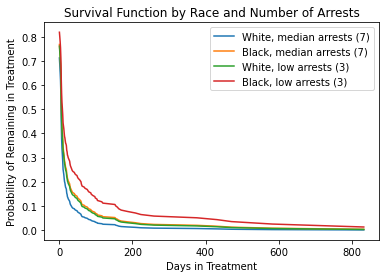

In [79]:
d_data = data.iloc[[83,74,59,79],:]
fig4 = cph.predict_survival_function(d_data).plot()
fig4.set(xlabel = "Days in Treatment", ylabel = "Probability of Remaining in Treatment",
        title = "Survival Function by Race and Number of Arrests")
fig4.legend(["White, median arrests (7)", "Black, median arrests (7)", 
             "White, low arrests (3)", "Black, low arrests (3)"])

The difference within race between low and median arrests is larger for Black prisoners. Having fewer arrests is associated with longer treatment time for Black prisoners to a greater extent than it is for White prisoners. 

### Conclusions

The Caplan-Meier survival function indicated a very steep dropoff in the probability of remaining in treatment. In other words, the majority of prisoners were in psychiatric creatment for a very short time; however, a few remained in treatment for years. 

I used Cox regression to add predictor variables to the model to see whether these variables influenced the length of treatment. There were no significant effects of number of arrests, B = -0.12, 95% CI [-0.71, 0.47], p = .70; time spent in jail, B = 0.00, 95% CI [-0.00, 0.00], p = .69; or number of crimes, B = 0.18, 95% CI [-0.43, 0.79], p = .56. There was a significant effect of race, B = -0.26, 95% CI [-0.50, -0.01], p = .04.

Inspection of survival functions by number of arrests and race indicated that Black prisoners spent longer in psychatric treatment compared to White prisoners. Prisoners with fewer arrests also spent longer in treatment, perhaps because being in psychatric treatment prevents one from being arrested; however, this effect was very small.

Overall, this analysis indicates that race was the only factor analyzed that had a significant effect on time spent in psychatric treatment. Further analysis is needed to identify reasons for Black prisoners spending longer in treatment, as well as treatment patterns for prisoners of other races.